In [1]:
import numpy as np
import random
from math import log, exp
from tqdm import tqdm
from collections import Counter

# Initialize variables
Z_dataset = []
labels_set = set()
alphabet = set()

# Read and process data
with open("/Users/majidtavakoli/Documents/Medical_bionformatics/decision support systems/Ecxersices/question.txt") as f:
    for line in f:
        label, data = line.split(" ", 1)
        data_array = list(map(int, data.split()))
        label_value = 1 if label.startswith("1") else -1
        Z_dataset.append((label_value, data_array))
        labels_set.add(label_value)
        alphabet.update(data_array)

# Convert labels to a list and sort alphabet
labels = sorted(labels_set)
alphabet = sorted(alphabet)

# Ensure binary classification
if len(labels) != 2:
    raise ValueError("Only binary classification is supported")

# Count label occurrences
label_counts = Counter(label for label, _ in Z_dataset)

# Output results
print("Count of labels:", label_counts)
print("Z Dataset:", Z_dataset)
print("Len Z Dataset:", len(Z_dataset))
print("Labels:", labels)
print("Alphabet:", alphabet)

# Shuffle the dataset
shuffled_Z = random.sample(Z_dataset, len(Z_dataset))

print("Shuffled Z Dataset:", shuffled_Z)


Count of labels: Counter({-1: 896, 1: 835})
Z Dataset: [(-1, [1, 2, 3, 4, 5]), (-1, [7, 8, 9, 10, 11, 12, 13, 14, 15, 5]), (-1, [17, 18, 19, 20, 21, 22, 5]), (-1, [7, 23, 24, 25, 26, 27, 28, 29, 30, 5]), (-1, [7, 31, 32, 33, 34, 35, 11, 36, 5]), (-1, [37, 18, 38, 39, 40, 5]), (-1, [7, 41, 11, 18, 42, 43, 44, 5]), (-1, [7, 45, 46, 47, 48, 17, 18, 49, 50, 51, 5]), (-1, [7, 52, 20, 18, 53, 54, 55, 34, 35, 5]), (-1, [7, 56, 34, 57, 11, 18, 58, 59, 5]), (-1, [61, 62, 1, 63, 64, 65, 66, 18, 67, 68, 5]), (-1, [37, 69, 70, 71, 5]), (-1, [37, 72, 73, 74, 75, 76, 5]), (-1, [77, 78, 79, 26, 80, 81, 82, 83, 5]), (-1, [84, 79, 85, 86, 87, 88, 89, 90, 24, 91, 92, 93, 94, 18, 95, 5]), (-1, [37, 18, 96, 97, 86, 98, 5]), (-1, [77, 99, 85, 100, 90, 101, 26, 102, 103, 104, 5, 105, 106, 5, 5]), (-1, [7, 107, 108, 109, 86, 90, 110, 5]), (-1, [7, 111, 9, 112, 11, 18, 113, 114, 5]), (-1, [7, 115, 34, 35, 11, 26, 116, 117, 118, 5]), (-1, [17, 18, 119, 120, 121, 122, 5]), (-1, [123, 62, 37, 124, 125, 126, 127,

ک مجموعه داده را می خواند و پردازش می کند، برچسب ها را به فرم باینری تبدیل می کند و داده ها را در Z_dataset جمع آوری می کند.
برچسب‌ها و مقادیر داده منحصر به فرد را در labels_set و alphabet ردیابی می‌کند.
طبقه بندی باینری را تضمین می کند، در غیر این صورت خطا ایجاد می کند.
تعداد رخدادهای برچسب را با استفاده از شمارنده شمارش می کند.
به طور تصادفی مجموعه داده را به هم ریخته و نتایج را چاپ می کند.

In [2]:
def contains_subsequence_(sequence, subsequence):
    sub_len = len(subsequence)
    for i in range(len(sequence) - sub_len + 1):
        if sequence[i:i + sub_len] == subsequence:
            return True
    
    return False

def compute_error(dataset, labels, weights, subsequence, potential_label):
    error = 0
    for i, (seq, l) in enumerate(zip(dataset, labels)):
        seq = seq[1]
        contains_subsequence = contains_subsequence_(seq, subsequence)
        if (contains_subsequence and l != potential_label) or (not contains_subsequence and l == potential_label):
            error += weights[i]
    return error

def find_best_sequence(Z, weights):
    best_sequence = None
    best_sequence_label = None
    best_error = float('inf')   
    labels = [label for label, _ in Z]

    for i in tqdm(range(len(Z))):
        sequence = Z[i][1]
        label = labels[i]

        for j in range(len(sequence)):
            for k in range(j + 1, len(sequence) + 1):
                subsequence = sequence[j:k]
                for potential_label in set(labels):
                    error = compute_error(Z, labels, weights, subsequence, potential_label)
                    if error < best_error:
                        best_error = error
                        best_sequence = subsequence
                        best_sequence_label = potential_label
    
    return best_sequence, best_sequence_label, best_error

def update_weights(dataset, labels, weights, best_sequence, best_label, alpha):
    updated_weights = np.copy(weights)
    for i, (seq, l) in enumerate(zip(dataset, labels)):
        seq = seq[1]
        contains_subsequence = contains_subsequence_(seq, best_sequence)

        if(contains_subsequence and l == best_label) or (not contains_subsequence and l != best_label):
            updated_weights[i] *= np.exp(alpha)
        else:
            updated_weights[i] *= np.exp(-alpha)
    
    return updated_weights / np.sum(updated_weights)


def classify(sequence, rules, alphas):
    score = 0
    for alpha, (seq, label) in zip(alphas, rules):
        if contains_subsequence_(sequence, seq):
            score += alpha if label == 1 else -alpha
        else:
            score += -alpha if label == 1 else alpha

    return np.sign(score)


def compute_classifier_error(dataset, classifier, rules, alphas):
    error_count = 0
    for label, sequence in dataset:
        if classifier(sequence, rules, alphas) != label:
            pred = classifier(sequence)
            print(f"Classifier prediction: {pred}, true label: {label}")
            error_count += 1
    return error_count / len(dataset)

 بررسی می کند که آیا یک زیر دنباله در یک دنباله است.
 با استفاده از وزن ها، خطای یک دنباله و برچسب را محاسبه می کند.
 دنباله فرعی را با کمترین خطا پیدا می کند.
 وزن مجموعه داده ها را بر اساس نتایج طبقه بندی تنظیم می کند.
 یک دنباله را با استفاده از قوانین و وزن ها طبقه بندی می کند.
 خطای کلی طبقه بندی کننده را در مجموعه داده محاسبه می کند.

In [3]:
def sequence_boosting(dataset, delta):
    N = len(dataset)
    weights = np.ones(N) / N
    alphas = []
    rules = []
    labels = [label for label, _ in dataset]
    classifier_errors = []
    iteration_info = []  # Initialize iteration_info here
    max_iterations = 100
    t = 1

    while t <= max_iterations:
        print(f"Iteration: {t}")
        
        # Find the best sequence and corresponding label with the lowest error
        best_sequence, best_label, error = find_best_sequence(dataset, weights)

        if best_sequence is None or error >= 0.5:
            break 

        # Calculate the weight of the current classifier
        alpha_t = 0.5 * log((1 - error) / (error + 1e-10))

        print(f"Best sequence: {best_sequence}, best label: {best_label}, error: {error:.4f}, alpha: {alpha_t:.4f}")
        alphas.append(alpha_t)
        rules.append((best_sequence, best_label))

        # Update the weights of the dataset
        weights = update_weights(dataset, labels, weights, best_sequence, best_label, alpha_t)
        
        # Compute the classifier error
        predictions = [classify(seq, rules, alphas) for _, seq in dataset]
        overall_classifier_error = np.mean([pred != true_label for pred, true_label in zip(predictions, labels)])
        classifier_errors.append(overall_classifier_error)

        print(f"Classifier error: {overall_classifier_error:.4f}")

        # Store iteration information
        iteration_info.append({
            "iteration": t,
            "alpha": alpha_t,
            "error": error,
            "classifier_error": overall_classifier_error,
            "weights": weights.copy(),
            "best_sequence": best_sequence,
            "best_label": best_label,
            "predictions": predictions
        })

        # Check if the stopping criteria are met
        if overall_classifier_error < delta:
            print("Classifier error below threshold.")
            break

        if overall_classifier_error == 0:
            print("Classifier error is zero.")
            break

        t += 1

    if t > max_iterations:
        print("Reached maximum number of iterations.")

    # Final classifier based on the accumulated rules and alphas
    final_classifier = lambda seq: classify(seq, rules, alphas)

    # Compute final predictions and performance metrics
    y_true = labels
    y_pred = predictions
    cm = confusion_matrix(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    return final_classifier, rules, alphas, classifier_errors, iteration_info, cm, accuracy


وزن های مجموعه داده را به طور یکنواخت اولیه می کند.
به صورت مکرر بهترین دنباله را با کمترین خطا پیدا می کند.
وزن طبقه بندی کننده (آلفا) را محاسبه می کند.
وزن مجموعه داده ها را بر اساس عملکرد طبقه بندی به روز می کند.
خطاهای کلی طبقه بندی کننده را ردیابی می کند و جزئیات تکرار را ذخیره می کند.
اگر خطای طبقه‌بندی کننده زیر یک آستانه باشد، به صفر برسد یا بعد از 100 تکرار متوقف شود.
طبقه‌بندی‌کننده نهایی، قوانین، آلفاها، خطاهای طبقه‌بندی، ماتریس سردرگمی و دقت را برمی‌گرداند.

In [4]:
from collections import Counter

# Count the labels in the first 100 elements of the shuffled dataset
count_shuffled_reduced = Counter(label for label, _ in shuffled_Z[:100])

# Display the count of labels
print(f"Count of labels in the first 100 shuffled examples: {dict(count_shuffled_reduced)}")


Count of labels in the first 100 shuffled examples: {-1: 50, 1: 50}


In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score



In [6]:
# Call the sequence_boosting function with the first 100 elements of shuffled_Z and a delta of 0.1
result = sequence_boosting(shuffled_Z[:100], delta=0.1)

# Unpack the result tuple directly into the corresponding variables
classifier, rules, alphas, errors, iteration_info, cm, accuracy = result


Iteration: 1


100%|██████████| 100/100 [00:00<00:00, 162.26it/s]


Best sequence: [7], best label: -1, error: 0.3300, alpha: 0.3541
Classifier error: 0.3300
Iteration: 2


100%|██████████| 100/100 [00:00<00:00, 163.64it/s]


Best sequence: [7], best label: -1, error: 0.1952, alpha: 0.7082
Classifier error: 0.3300
Iteration: 3


100%|██████████| 100/100 [00:00<00:00, 163.35it/s]


Best sequence: [7], best label: -1, error: 0.0556, alpha: 1.4164
Classifier error: 0.3300
Iteration: 4


100%|██████████| 100/100 [00:00<00:00, 161.50it/s]


Best sequence: [7], best label: -1, error: 0.0035, alpha: 2.8327
Classifier error: 0.3300
Iteration: 5


100%|██████████| 100/100 [00:00<00:00, 154.24it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 5.6655
Classifier error: 0.3300
Iteration: 6


100%|██████████| 100/100 [00:00<00:00, 152.20it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.0671
Classifier error: 0.3300
Iteration: 7


100%|██████████| 100/100 [00:00<00:00, 153.98it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 8


100%|██████████| 100/100 [00:00<00:00, 155.23it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 9


100%|██████████| 100/100 [00:00<00:00, 157.33it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 10


100%|██████████| 100/100 [00:00<00:00, 161.91it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 11


100%|██████████| 100/100 [00:00<00:00, 152.70it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 12


100%|██████████| 100/100 [00:00<00:00, 161.40it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 13


100%|██████████| 100/100 [00:00<00:00, 161.61it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 14


100%|██████████| 100/100 [00:00<00:00, 161.32it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 15


100%|██████████| 100/100 [00:00<00:00, 161.42it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 16


100%|██████████| 100/100 [00:00<00:00, 160.48it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 17


100%|██████████| 100/100 [00:00<00:00, 154.50it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 18


100%|██████████| 100/100 [00:00<00:00, 162.17it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 19


100%|██████████| 100/100 [00:00<00:00, 162.38it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 20


100%|██████████| 100/100 [00:00<00:00, 161.98it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 21


100%|██████████| 100/100 [00:00<00:00, 161.71it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 22


100%|██████████| 100/100 [00:00<00:00, 161.82it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 23


100%|██████████| 100/100 [00:00<00:00, 155.21it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 24


100%|██████████| 100/100 [00:00<00:00, 156.81it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 25


100%|██████████| 100/100 [00:00<00:00, 161.68it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 26


100%|██████████| 100/100 [00:00<00:00, 162.12it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 27


100%|██████████| 100/100 [00:00<00:00, 162.80it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 28


100%|██████████| 100/100 [00:00<00:00, 160.89it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 29


100%|██████████| 100/100 [00:00<00:00, 154.20it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 30


100%|██████████| 100/100 [00:00<00:00, 160.57it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 31


100%|██████████| 100/100 [00:00<00:00, 161.84it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 32


100%|██████████| 100/100 [00:00<00:00, 162.15it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 33


100%|██████████| 100/100 [00:00<00:00, 162.21it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 34


100%|██████████| 100/100 [00:00<00:00, 162.24it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 35


100%|██████████| 100/100 [00:00<00:00, 161.92it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 36


100%|██████████| 100/100 [00:00<00:00, 153.79it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 37


100%|██████████| 100/100 [00:00<00:00, 162.05it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 38


100%|██████████| 100/100 [00:00<00:00, 161.70it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 39


100%|██████████| 100/100 [00:00<00:00, 161.99it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 40


100%|██████████| 100/100 [00:00<00:00, 161.99it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 41


100%|██████████| 100/100 [00:00<00:00, 161.39it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 42


100%|██████████| 100/100 [00:00<00:00, 154.40it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 43


100%|██████████| 100/100 [00:00<00:00, 162.05it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 44


100%|██████████| 100/100 [00:00<00:00, 162.05it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 45


100%|██████████| 100/100 [00:00<00:00, 161.93it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 46


100%|██████████| 100/100 [00:00<00:00, 161.20it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 47


100%|██████████| 100/100 [00:00<00:00, 161.66it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 48


100%|██████████| 100/100 [00:00<00:00, 154.12it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 49


100%|██████████| 100/100 [00:00<00:00, 162.08it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 50


100%|██████████| 100/100 [00:00<00:00, 162.30it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 51


100%|██████████| 100/100 [00:00<00:00, 161.74it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 52


100%|██████████| 100/100 [00:00<00:00, 161.80it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 53


100%|██████████| 100/100 [00:00<00:00, 162.37it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 54


100%|██████████| 100/100 [00:00<00:00, 154.86it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 55


100%|██████████| 100/100 [00:00<00:00, 161.53it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 56


100%|██████████| 100/100 [00:00<00:00, 161.63it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 57


100%|██████████| 100/100 [00:00<00:00, 161.65it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 58


100%|██████████| 100/100 [00:00<00:00, 161.52it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 59


100%|██████████| 100/100 [00:00<00:00, 161.84it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 60


100%|██████████| 100/100 [00:00<00:00, 154.68it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 61


100%|██████████| 100/100 [00:00<00:00, 161.29it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 62


100%|██████████| 100/100 [00:00<00:00, 161.43it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 63


100%|██████████| 100/100 [00:00<00:00, 157.07it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 64


100%|██████████| 100/100 [00:00<00:00, 161.37it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 65


100%|██████████| 100/100 [00:00<00:00, 161.40it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 66


100%|██████████| 100/100 [00:00<00:00, 154.55it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 67


100%|██████████| 100/100 [00:00<00:00, 161.92it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 68


100%|██████████| 100/100 [00:00<00:00, 161.85it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 69


100%|██████████| 100/100 [00:00<00:00, 161.60it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 70


100%|██████████| 100/100 [00:00<00:00, 161.60it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 71


100%|██████████| 100/100 [00:00<00:00, 161.08it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 72


100%|██████████| 100/100 [00:00<00:00, 153.98it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 73


100%|██████████| 100/100 [00:00<00:00, 161.97it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 74


100%|██████████| 100/100 [00:00<00:00, 161.33it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 75


100%|██████████| 100/100 [00:00<00:00, 161.66it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 76


100%|██████████| 100/100 [00:00<00:00, 159.23it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 77


100%|██████████| 100/100 [00:00<00:00, 161.62it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 78


100%|██████████| 100/100 [00:00<00:00, 152.34it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 79


100%|██████████| 100/100 [00:00<00:00, 159.01it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 80


100%|██████████| 100/100 [00:00<00:00, 161.72it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 81


100%|██████████| 100/100 [00:00<00:00, 161.40it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 82


100%|██████████| 100/100 [00:00<00:00, 161.83it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 83


100%|██████████| 100/100 [00:00<00:00, 162.05it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 84


100%|██████████| 100/100 [00:00<00:00, 153.32it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 85


100%|██████████| 100/100 [00:00<00:00, 161.76it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 86


100%|██████████| 100/100 [00:00<00:00, 161.42it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 87


100%|██████████| 100/100 [00:00<00:00, 161.73it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 88


100%|██████████| 100/100 [00:00<00:00, 160.62it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 89


100%|██████████| 100/100 [00:00<00:00, 161.73it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 90


100%|██████████| 100/100 [00:00<00:00, 154.06it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 91


100%|██████████| 100/100 [00:00<00:00, 161.40it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 92


100%|██████████| 100/100 [00:00<00:00, 161.61it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 93


100%|██████████| 100/100 [00:00<00:00, 161.68it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 94


100%|██████████| 100/100 [00:00<00:00, 161.51it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 95


100%|██████████| 100/100 [00:00<00:00, 161.67it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 96


100%|██████████| 100/100 [00:00<00:00, 151.84it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 97


100%|██████████| 100/100 [00:00<00:00, 161.63it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 98


100%|██████████| 100/100 [00:00<00:00, 158.07it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 99


100%|██████████| 100/100 [00:00<00:00, 161.49it/s]


Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Iteration: 100


100%|██████████| 100/100 [00:00<00:00, 161.42it/s]

Best sequence: [7], best label: -1, error: 0.0000, alpha: 11.5129
Classifier error: 0.3300
Reached maximum number of iterations.


In [7]:
# Calculate the number of correct predictions
correct_predictions = sum(1 for label, sequence in shuffled_Z[:100] if classifier(sequence) == label)

# Print the results
total_predictions = len(shuffled_Z[:100])
print(f"Number of correct predictions: {correct_predictions} out of {total_predictions}")
print(f"Percentage of correct: {(correct_predictions * 100) / total_predictions:.2f}%")



Number of correct predictions: 67 out of 100
Percentage of correct: 67.00%


Weight interpretation

In [8]:
import pandas as pd
import plotly.express as px
import os

def plot_weights(iteration_info, output_dir="boosting_output", filename="weights.html"):
    # Create a DataFrame to hold the data for all iterations
    data = [
        {'Data Point': idx, 'Weight': weight, 'Iteration': f"Iteration {info['iteration']}"}
        for info in iteration_info
        for idx, weight in enumerate(info['weights'])
    ]

    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data)

    # Create the line plot using Plotly Express
    fig = px.line(
        df,
        x='Data Point',
        y='Weight',
        color='Iteration',
        labels={'Data Point': 'Data Point', 'Weight': 'Weights', 'Iteration': 'Iterations'},
        title='Weights Distribution Over Iterations'
    )

    # Show the plot
    fig.show()

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save the plot as an HTML file
    fig.write_html(os.path.join(output_dir, filename))

# Call the function with iteration_info
plot_weights(iteration_info)



Alphas interpretation

In [9]:
import pandas as pd
import plotly.express as px
import os

def plot_alphas(iteration_info, output_dir="boosting_output", filename="alphas.html"):
    # Extract iteration numbers and alpha values
    data = [{'Iteration': info['iteration'], 'Alpha': info['alpha']} for info in iteration_info]

    # Convert the list of dictionaries to a pandas DataFrame
    df = pd.DataFrame(data)

    # Create the line plot using Plotly Express
    fig = px.line(
        df,
        x='Iteration',
        y='Alpha',
        labels={'Iteration': 'Iteration', 'Alpha': 'Alpha'},
        title='Alpha Values Over Iterations',
        markers=True  # Ensures markers are shown on the line
    )

    # Show the plot
    fig.show()

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save the plot as an HTML file
    fig.write_html(os.path.join(output_dir, filename))

# Call the function with iteration_info
plot_alphas(iteration_info)


In [10]:
import pandas as pd
import plotly.express as px
import os

def plot_classifier_errors(classifier_errors, output_dir="boosting_output", filename="error.html"):
    # Create a DataFrame with iterations and corresponding classifier errors
    data = {
        'Iteration': list(range(1, len(classifier_errors) + 1)),
        'Classifier Error': classifier_errors
    }
    
    df = pd.DataFrame(data)

    # Create the line plot with markers using Plotly Express
    fig = px.line(
        df,
        x='Iteration',
        y='Classifier Error',
        labels={'Iteration': 'Iteration', 'Classifier Error': 'Classifier Error'},
        title='Classifier Errors Over Iterations',
        markers=True  # Adds markers to the plot
    )

    # Show the plot
    fig.show()

    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)

    # Save the plot as an HTML file
    fig.write_html(os.path.join(output_dir, filename))

# Call the function with classifier_errors
plot_classifier_errors(errors)


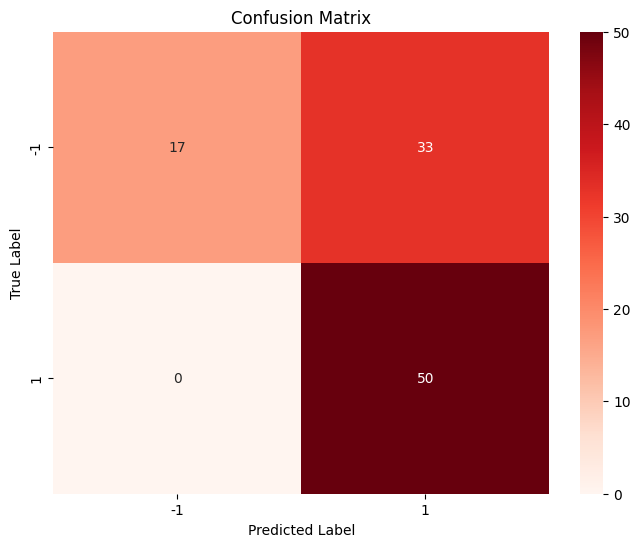

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def plot_confusion_matrix(cm, class_names, title='Confusion Matrix', cmap='Blues', output_dir="boosting_output", filename="confusion_matrix.png"):
    # Check for correct class names input
    if len(class_names) != 2:
        raise ValueError("class_names must have exactly two elements representing the classes.")
    
    plt.figure(figsize=(8, 6))
    
    # Plot the heatmap
    sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, xticklabels=class_names, yticklabels=class_names)
    
    # Set titles and labels
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    
    # Ensure the output directory exists
    os.makedirs(output_dir, exist_ok=True)
    
    # Save the figure
    plt.savefig(os.path.join(output_dir, filename))
    
    # Show the plot
    plt.show()

# Corrected call to the function
plot_confusion_matrix(cm, class_names=['-1', '1'], title='Confusion Matrix', cmap='Reds')




In [12]:
print(f"Accuracy: {accuracy}")

Accuracy: 0.67
